# United State Census

The data here is for the "Census Income" dataset, which contains data on adults from the 1994 census. This data is labeled with whether the person's yearly income is above or below $50K (and you are trying to model and predict this).

In [1]:
#importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import *
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import *
from sklearn.svm import SVC
from sklearn.metrics import *
%matplotlib inline

C:\Users\karan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#import and read data sets
ds = pd.read_csv('census_census.csv')
df=ds.head()
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#features of data set
ds.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [4]:
#describe data set
df.describe

<bound method NDFrame.describe of    age         workclass  fnlwgt  education  education.num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital.status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital.gain  capital.loss  hours.per.week native.country income  
0          2174             0              40  United-States  <=50K  
1       

In [5]:
#fnlwgt defines for "final weight" but it is not of our concern.
ds = ds.drop('fnlwgt', axis=1)

In [6]:
#shape of data set
ds.shape

(32561, 14)

In [7]:
#find all null values in data set
ds.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

There are no any missing values in the Dataset.

## Miscoded value:
Some data contain "?" instead for all possible inputs from the attributes data.

In [8]:
#replace all miscoded value from the dataset 
ds['age'] = ds['age'].replace('?',ds.age.mean())
ds['workclass'] = ds['workclass'].replace('?','private')
ds['education'] = ds['education'].replace('?','some-college')
ds['education.num'] = ds['education.num'].replace('?',ds.age.mean())
ds['marital.status'] = ds['marital.status'].replace('?','Never-married')
ds['occupation'] = ds['occupation'].replace('?','sales')
ds['relationship'] = ds['relationship'].replace('?','Not-in-family')
ds['race'] = ds['race'].replace('?','white')
ds['sex'] = ds['sex'].replace('?','Male')
ds['capital.gain'] = ds['capital.gain'].replace('?',ds.age.mean())
ds['capital.loss'] = ds['capital.loss'].replace('?',ds.age.mean())
ds['hours.per.week'] = ds['hours.per.week'].replace('?',ds.age.mean())
ds['native.country'] = ds['native.country'].replace('?','United States')
ds['income'] = ds['income'].replace('?','<=50')
# I have changed the miscoded value to generic value of attribute in the data set

# Exploratory Data Analysis on the data

EDA will help in predict whether the person's yearly income is above or below $50K  based on various parameters.

## Discription about data:
-age: Tells about age of the person and continuous in nature.

-workclass: It defines whether the person belongs to Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked in terms of way of income.

-fnlwgt: It shows financial status and it is continuous in nature.

-education:It shows education qulalification of person whether they are Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

-education-num:Continuous and represent the education qualification into numbers.

-marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

-occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

-relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

-race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

-sex: Female, Male.

---Following Dataset attributes shows financial growth of person:

-capital-gain: continuous.

-capital-loss: continuous.

-hours-per-week: continuous.

-native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [9]:
#Find correlation
ds.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,0.036527,0.077674,0.057775,0.068756
education.num,0.036527,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,0.148123,0.078409,0.054256,1.000000


Univariate Analysis: Analyzing single feature of the data set

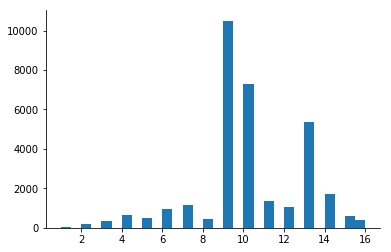

In [10]:
#plot histogram for education qualification.
plt.hist(x  = 'education.num',data=ds, bins=30)
sns.despine()

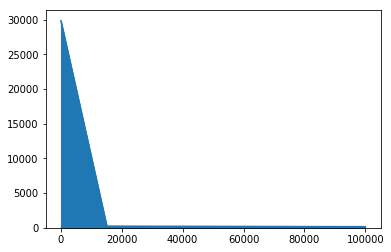

In [11]:
#area plot for Capital_gain
ds['capital.gain'].value_counts().plot.area()

C:\Users\karan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


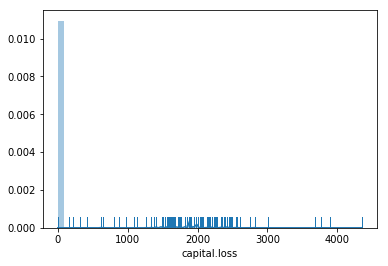

In [12]:
#distplot
sns.distplot(ds['capital.loss'], rug = True);

C:\Users\karan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


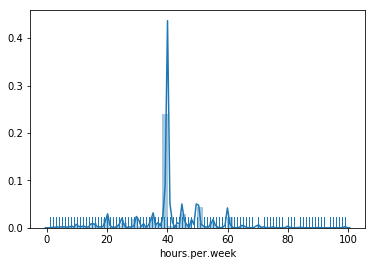

In [13]:
#distplot
sns.distplot(ds['hours.per.week'], rug = True);

C:\Users\karan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


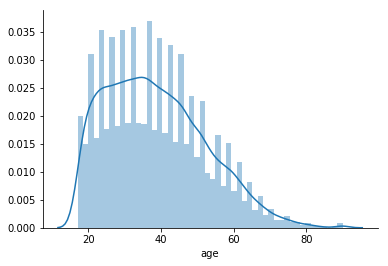

In [14]:
#dist plot
sns.distplot(ds['age'])
sns.despine()


Bivariant Graph: . It tells us about the dependencies, association and relation between two specific features. After analysing their relation, we can remove or change the level of their dependencies on each other

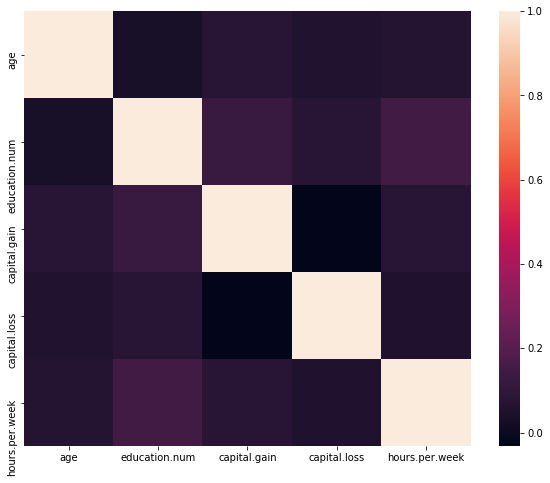

In [15]:
#plot heatmap to identify correlation#plot he 
plt.figure(figsize=(10,8))
sns.heatmap(ds.corr())

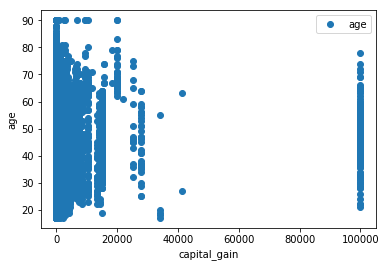

In [16]:
#plot age Vs. fnlwgt
ds.plot(x='capital.gain',y='age', style ='o')
plt.xlabel('capital_gain')
plt.ylabel('age')
plt.show()

C:\Users\karan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\karan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


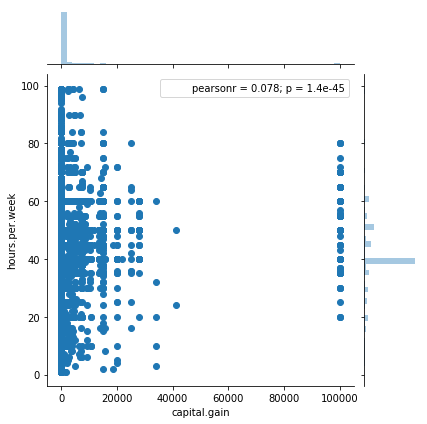

In [17]:
#jointplot between price and bedrooms
sns.jointplot(x='capital.gain',y='hours.per.week',data=ds)

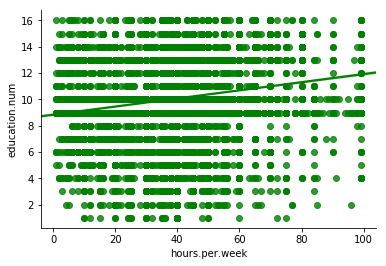

In [18]:
#regplot
sns.regplot(x = 'hours.per.week', y='education.num',data = ds, color = 'green')
sns.despine()

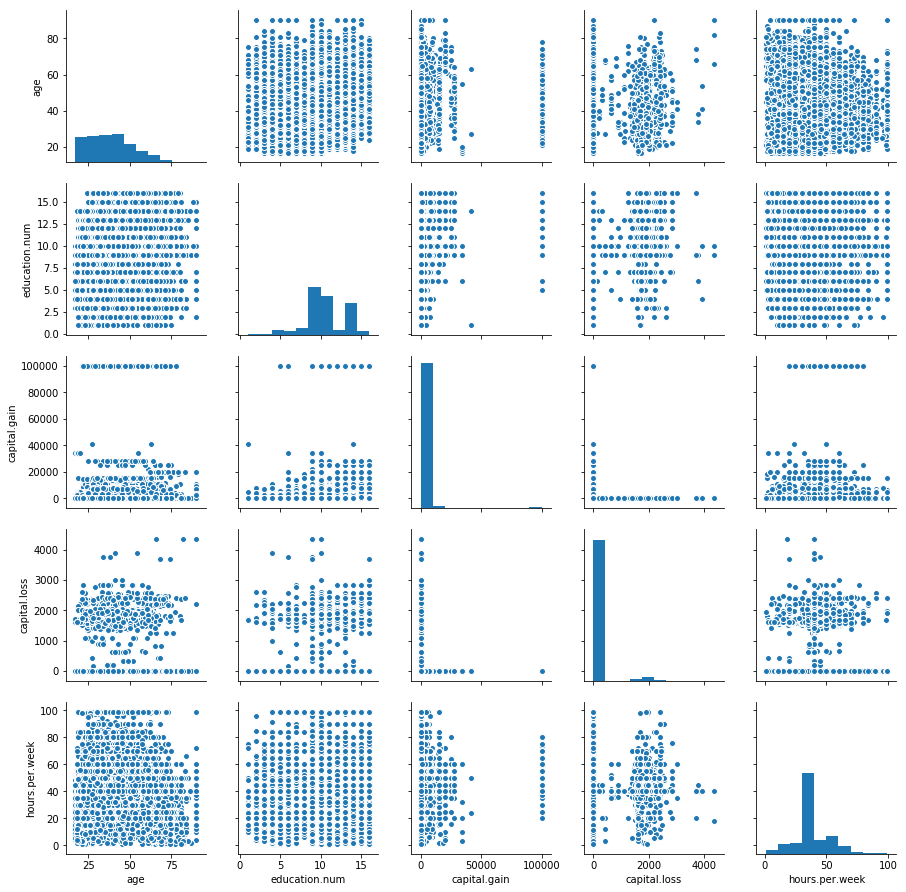

In [19]:
#paiplot of dataset
sns.pairplot(ds)

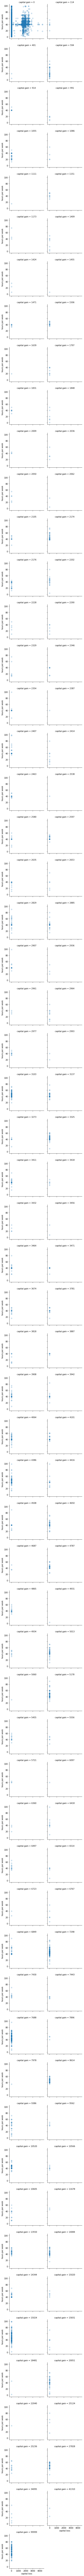

In [20]:
#facet grid
g = sns.FacetGrid(ds, col='capital.gain',col_wrap=2)
g.map(plt.scatter,'capital.loss','hours.per.week',alpha = 0.2)
p=sns.despine()

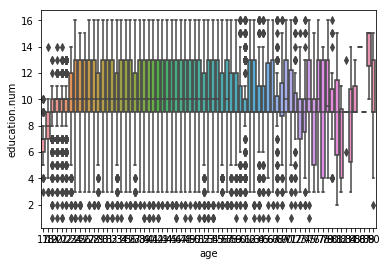

In [21]:
#boxplot of dataset
sns.boxplot(x='age',y = 'education.num', data =ds);

## Feature Engineering

Feature engineering means building additional features out of existing data which is often spread across multiple related tables. Feature engineering requires extracting the relevant information from the data and getting it into a single table which can then be used to train a machine learning model.



To perform feature engineering, we need to convert string to some values using get_dummies

In [22]:
df = pd.get_dummies(ds, columns=['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income'])
df.head(20)

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United States,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,37,14,0,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
6,49,5,0,0,16,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,52,9,0,0,45,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
8,31,14,14084,0,50,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
9,42,13,5178,0,40,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
x= pd.get_dummies(ds.drop('income',axis=1)).values.astype(np.float32)
y= (ds['income'].values == '>50K').astype(np.int32)

In [24]:
#perform split on training data
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3, random_state =85)

## Linear Regression

Linear Regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).

In [25]:
regressor =  LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
linear=regressor.score(x_test,y_test)*100
linear

35.63083512053764

# Logistic Regression
Logistic regression models the probability of the default class.Logistic Regression measures the relationship between the dependent variable (our label, what we want to predict) and the one or more independent variables (our features), by estimating probabilities using it’s underlying logistic function.

In [27]:
l_regressor = LogisticRegression()
l_regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
logistic=l_regressor.score(x_test,y_test)*100
logistic

85.09571092230526

## Gradient Boosting Regressor

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees

In [29]:
gbr = GradientBoostingRegressor(n_estimators=50)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [30]:
g=gbr.score(x_test,y_test)*100
g

46.707125505098354

## Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [31]:
clf = RandomForestRegressor(n_estimators=25,max_depth=10,random_state= 20).fit(x_train,y_train)
results = model_selection.cross_val_score(clf, x_train,y_train)
r=results.mean()*100
r

47.03840640966075

# Gaussian Naive Bayes
calculate the probabilities for input values for each class using a frequency. With real-valued inputs, we can calculate the mean and standard deviation of input values (x) for each class to summarize the distribution.

In [32]:
gass = GaussianNB()
gass.fit(x_train,y_train)

GaussianNB(priors=None)

In [33]:
gas=gass.score(x_test,y_test)*100
gas

79.79322346197154

# KNN for Classification
When KNN is used for classification, the output can be calculated as the class with the highest frequency from the K-most similar instances. Each instance in essence votes for their class and the class with the most votes is taken as the prediction.

Class probabilities can be calculated as the normalized frequency of samples that belong to each class in the set of K most similar instances for a new data instance.

In [34]:
#k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [35]:
k=knn.score(x_test,y_test)*100
k

83.40669464633022

In [36]:
algo = ["Linear Regression","Logistic Regression","Gradient Boosting Regressor","Gassuian Naive Bayes","Random Forest Regressor","KNN"]
result = [linear,logistic,g,gas,r,k]

In [37]:
table = pd.DataFrame({"Algo":algo,"Accuracy":result},index=[1,2,3,4,5,6])
table

,Algo,Accuracy
1,Linear Regression,35.630835
2,Logistic Regression,85.095711
3,Gradient Boosting Regressor,46.707126
4,Gassuian Naive Bayes,79.793223
5,Random Forest Regressor,47.038406
6,KNN,83.406695


From the above result, Logistic Regression predicting algorithm works best.